Project Flow:
------------
1. Problem Statement
2. Data Gathering

3. Data Preprocessing: Here we perform some operations on data
    A. Tokenization
    B. Lower Case
    C. Stopwords 
    D. Lemmatization / Stemming
    
4. Vectorization (Convert Text data into the Vector):
    A. Bag Of Words (CountVectorizer)
    B. TF-IDF
    
5. Model Building:
    A. Model Object Initialization
    B. Train and Test the Model
    
6. Model Evaluation:
    A. Accuracy Score
    B. Confusion Matrix
    C. Classification Report

In [4]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
# from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Read data from CSV file
df = pd.read_csv('fake_news_data.csv')          
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
# dropping the first unnamed columns which of no use
df = df.drop(columns = 'Unnamed: 0', axis = 1)
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
print(df.info())
print()
print(f"total rows : {df.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

total rows : 72134


In [6]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [7]:
df['label'].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

In [8]:
# function for plotting the bar chart
# Dataset contains four columns: Serial number (starting from 0); 
# Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).

def bar_chart(col): 
    real = df[df["label"] == 1][col].value_counts()  
    fake = df[df["label"] == 0][col].value_counts()  
    
    df1 = pd.DataFrame([real, fake]) 
    df1.index = ["real", "fake"]
    df1.plot(kind = "bar") 

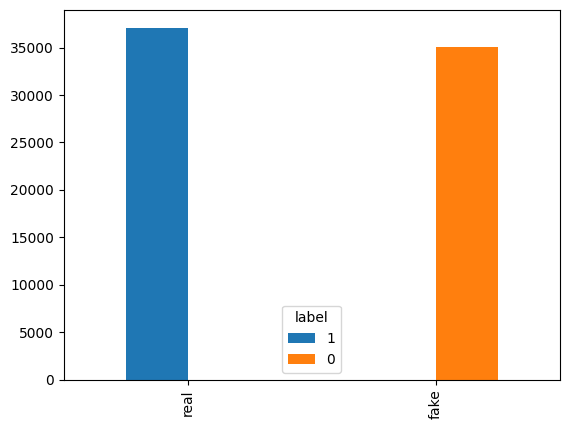

In [9]:
bar_chart('label')

In [10]:
# Since this is a text data we cant apply mean, median type method
# this are commonly used for numeric data
# mode is commonly used for categorical data
# as this is a text data and missing values are not very large in number and that is why we can drop them

df = df.dropna()

In [11]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [12]:
df.shape

(71537, 3)

In [13]:
df.reset_index(inplace = True)
df.head()

,index,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
2,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
3,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [14]:
for i in range(0, 6):
    print(f"{i}-text\n\n {df.iloc[i, 1]}")
    print()

0-text

 LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]

1-text

 UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]

2-text

 Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid

3-text

 SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice

4-text

 About Time! Christian Group Sues Amazon and SPLC for Designation as Hate Group

5-text

 DR BEN CARSON TARGETED BY THE IRS: “I never had an audit until I spoke at the National Prayer Breakfast.”



In [15]:
df1 = df.iloc[:10000, :]
df1.shape

(10000, 4)

In [16]:
new_df = df1[['title', 'label']]
new_df.head()

,title,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
2,"Bobby Jindal, raised Hindu, uses story of Chri...",0
3,SATAN 2: Russia unvelis an image of its terrif...,1
4,About Time! Christian Group Sues Amazon and SP...,1


# DATA PROCESSING

# 1] TOKENIZATION and LOWERCASE

In [17]:
sample = 'Data scientist roles are hard, Practise is needed a lot, data is new oil'
a = sample.split()
to_lower = [i.lower() for i in a]
# tokens = {}
# for i in to_lower:
#     c = to_lower.count(i)
#     tokens.update({i:c})
# tokens

# 2] Removing stopwords

In [18]:
sw = stopwords.words('english')
print(sw[:11])
print(len(sw))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]
179


In [21]:
print(len(to_lower))
new_set = [i for i in to_lower if i not in sw]
print(new_set)
print(len(new_set))

14
['data', 'scientist', 'roles', 'hard,', 'practise', 'needed', 'lot,', 'data', 'new', 'oil']
10


# 3] Stemming

In [22]:
ss = SnowballStemmer('english', ignore_stopwords = True)
words = ['lazy', "writing", 'writes', 'programming', 'programs', 'history', 'finally', 'finalized', 'fairly', 'sportingly']
print(words)
stemmed = [ss.stem(i) for i in words]
print(stemmed)

['lazy', 'writing', 'writes', 'programming', 'programs', 'history', 'finally', 'finalized', 'fairly', 'sportingly']
['lazi', 'write', 'write', 'program', 'program', 'histori', 'final', 'final', 'fair', 'sport']


In [23]:
sw = stopwords.words('english')
ss = SnowballStemmer('english', ignore_stopwords = True)
corpus = []
for i in range (len(new_df)):
    review = re.sub('^a-zA-Z0-9',' ', new_df['title'][i])
    review = review.lower()
    review = review.split()
    review = [ss.stem(x) for x in review if x not in sw]
    review = " ".join(review)
    corpus.append(review)

In [24]:
print(new_df['title'][0])
print()
print(corpus[0])

LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]

law enforc high alert follow threat cop white 9-11bi #blacklivesmatt #fyf911 terrorist [video]


# Vectorization

In [25]:
tf = TfidfVectorizer()
x = tf.fit_transform(corpus).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
y = new_df['label']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: label, dtype: int64

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10, stratify = y )

In [28]:
len(x_train), len(y_train)

(7000, 7000)

In [29]:
len(x_test), len(y_test)

(3000, 3000)

In [42]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [43]:
pred = nb_classifier.predict(x_test)

In [44]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1444
           1       0.84      0.84      0.84      1556

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



Text(70.72222222222221, 0.5, 'Real Labels')

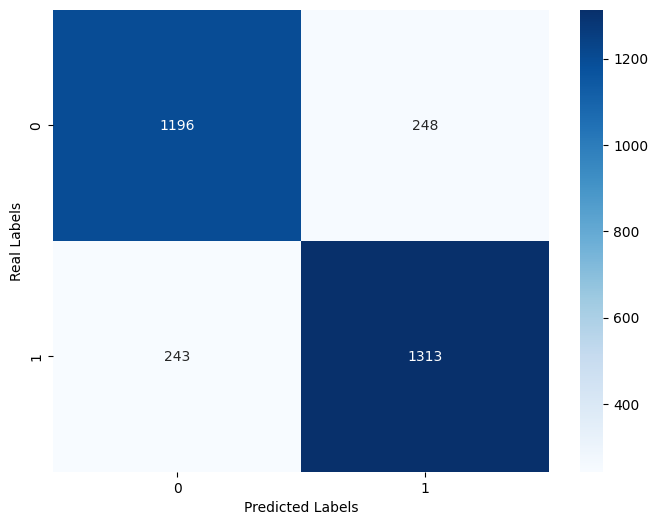

In [45]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, pred), annot = True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [47]:
lr_pred = lr.predict(x_test)

In [48]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1444
           1       0.85      0.90      0.87      1556

    accuracy                           0.86      3000
   macro avg       0.87      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



Text(70.72222222222221, 0.5, 'Real Labels')

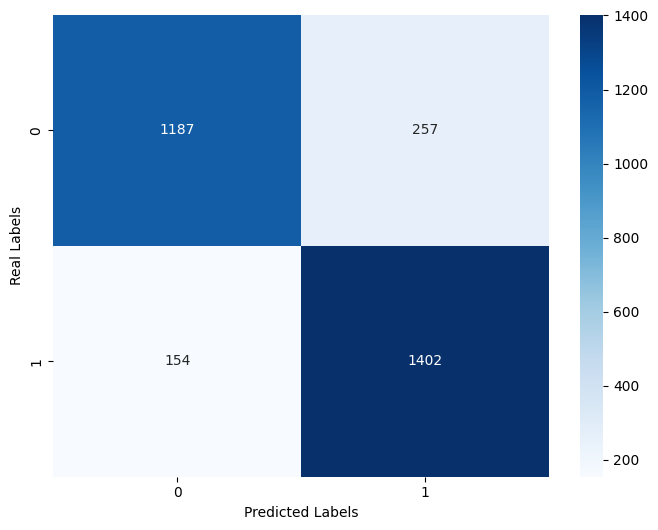

In [49]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, lr_pred), annot = True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [52]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

grid = {"C":[0.001, 0.1, 1, 10]}# l1 lasso l2 ridge
lr_cv = GridSearchCV(lr, grid, cv = 10)
lr_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :", lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1}
accuracy : 0.8594285714285714


In [53]:
updated_lr = LogisticRegression(C = 1)
updated_lr.fit(x_train, y_train)
print("score", updated_lr.score(x_test, y_test))

score 0.863


In [64]:
### Vectorizing the text ###  

from sklearn.feature_extraction.text import CountVectorizer 

count_vector = CountVectorizer(lowercase = False) 

In [65]:
cv_x = count_vector.fit_transform(corpus).toarray()
cv_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
cv_x_train, cv_x_test, cv_y_train, cv_y_test = train_test_split(cv_x, y, test_size = 0.2, random_state = 10, stratify = y )

In [67]:
cv_lr = LogisticRegression()
cv_lr.fit(cv_x_train, cv_y_train)

LogisticRegression()

In [68]:
cv_lr_pred = cv_lr.predict(cv_x_test)

In [69]:
print(classification_report(cv_y_test, cv_lr_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       962
           1       0.87      0.88      0.87      1038

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



Text(70.72222222222221, 0.5, 'Real Labels')

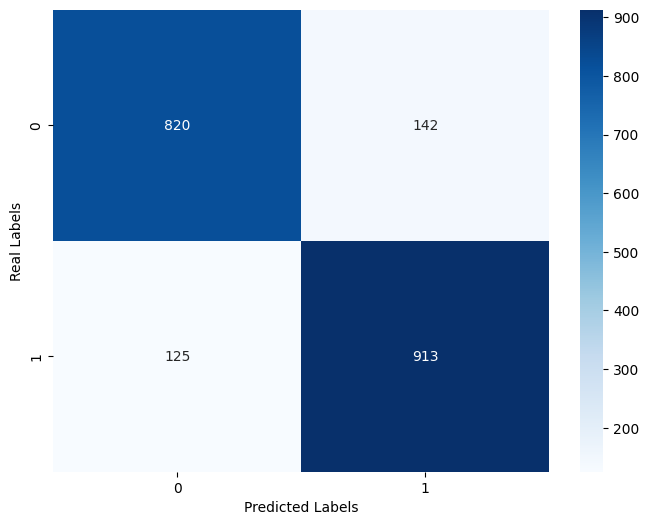

In [70]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(cv_y_test, cv_lr_pred), annot = True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

False Positive: (Type 1 Error)

Interpretation: You predicted positive and it’s false.

You predicted that a man is pregnant but he actually is not.

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300, max_depth = 5, random_state = 42)
rf.fit(cv_x_train, cv_y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)

In [82]:
rf_pred = rf.predict(cv_x_test)

In [83]:
print(classification_report(cv_y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.37      0.54       962
           1       0.63      0.99      0.77      1038

    accuracy                           0.69      2000
   macro avg       0.80      0.68      0.65      2000
weighted avg       0.80      0.69      0.66      2000



Text(70.72222222222221, 0.5, 'Real Labels')

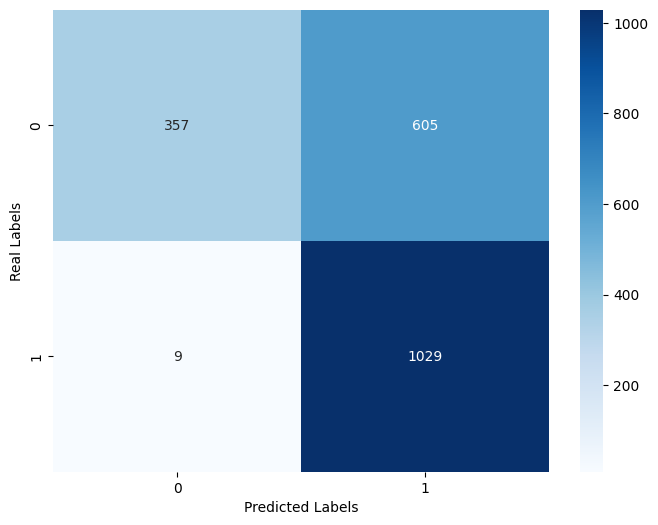

In [84]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(cv_y_test, rf_pred), annot = True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')